<a href="https://colab.research.google.com/github/doudi0101/DataViz/blob/main/Seaborn/raw/titanic-data-visualization-and-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [58]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set_style('whitegrid')

%matplotlib inline

In [59]:
###Loading the data
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


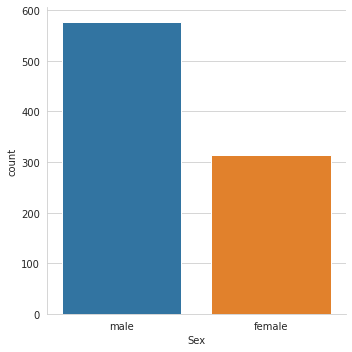

In [61]:
###Who were the passengers on the titanic? (What age, gender, class etc)

###Gender Plot
sns.factorplot('Sex',data=titanic_df,kind='count')

### Shows more male passengers than female 

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


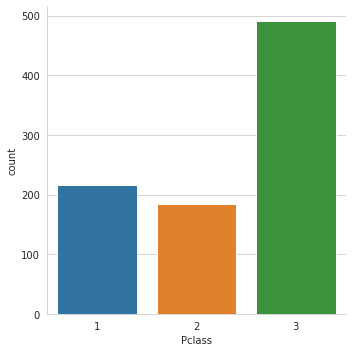

In [62]:
### Class plot
sns.factorplot('Pclass',data=titanic_df,kind='count')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


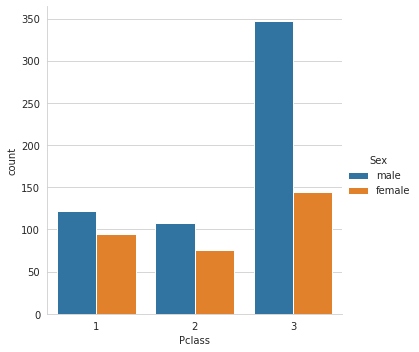

In [63]:
###Interesting! More passengers are from class Three. Now lets find the gender ration among the classes

sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')


In [64]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)
        

In [65]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


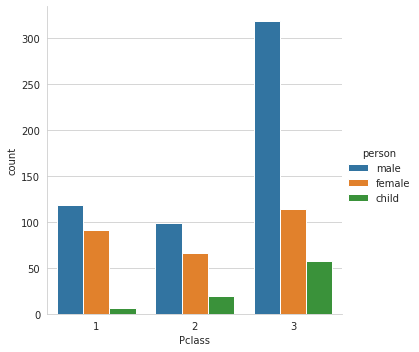

In [66]:
### Plotting a graph to check the ratio of male,female and children in each category of class

sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

More number of males, females and children in the class three. WIll this insight help us in  making  prediction? let's check it out!


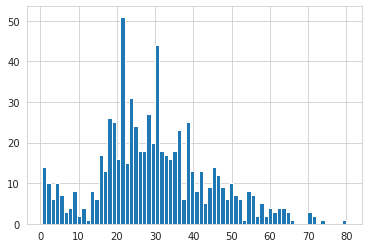

In [67]:
###Now let us look at the ages of the passengers

titanic_df['Age'].hist(bins=70)

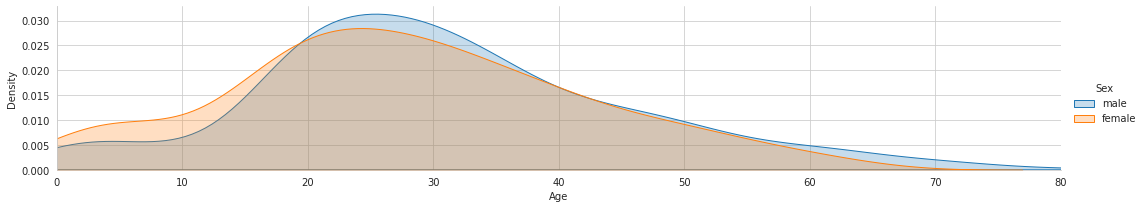

In [68]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

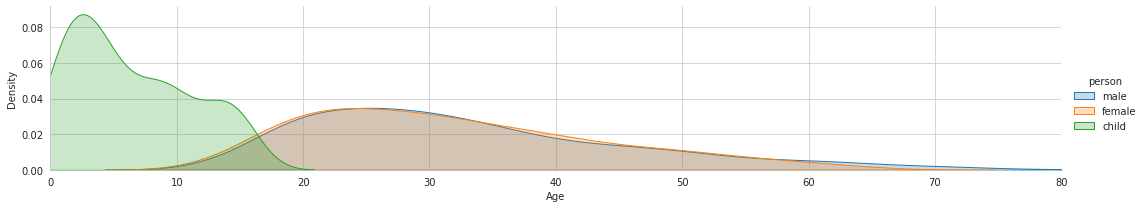

In [69]:
as_fig = sns.FacetGrid(titanic_df,hue='person',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

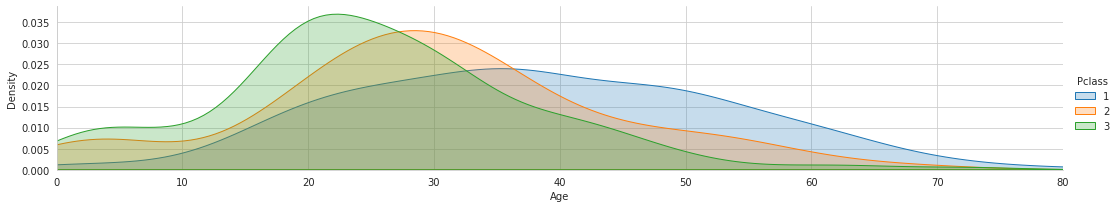

In [70]:
as_fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

From the above graphs, we can infer that there are more number of passengers with a age group of 20 to 40 in all the three classes.

In [71]:
###Mean age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [72]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [73]:
#### Drop the Cabin column as there are many null values and it does not help in making prediction

titanic_df.drop('Cabin',axis=1,inplace=True)

In [74]:
## Filling the null values in the Embarked column with S as there are more number of passengers boarded from Southhampton
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')



In [75]:
## To check if there are still any null values in the dataset
titanic_df.isnull().values.any()

False

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


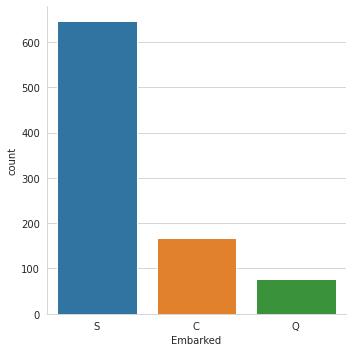

In [76]:
sns.factorplot('Embarked',data=titanic_df,kind='count')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


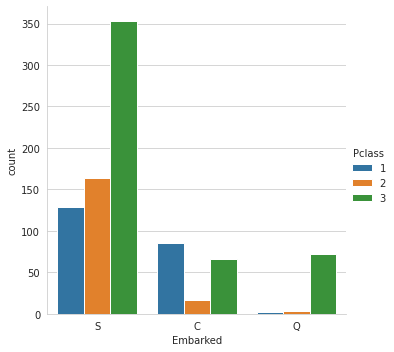

In [77]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

It is intereting to see that most of the passengers boarded at Queenstown are from 3rd class. And many passengers boarded at Southhampton. Will this help in making predictions? 

In [78]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp


In [79]:
## if Alone value is >0 then they are with family else they are Alone

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Without Family'


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


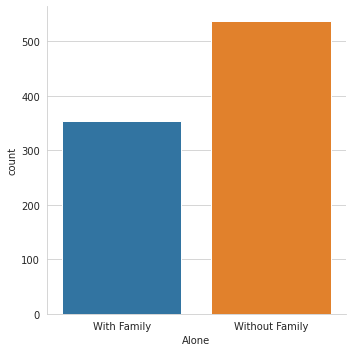

In [80]:
#Let us visualise the Alone column

sns.factorplot('Alone',kind='count',data=titanic_df)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


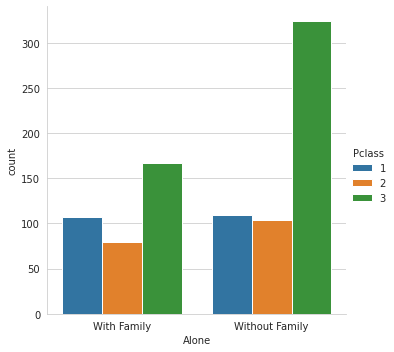

In [81]:
# let us see who are alone according to class
sns.factorplot('Alone',kind='count',data=titanic_df,hue='Pclass')

Let's dig deeper into data and find out what factors helped survival.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


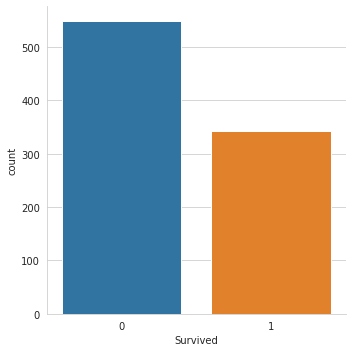

In [82]:
sns.factorplot('Survived',data=titanic_df,kind='count')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


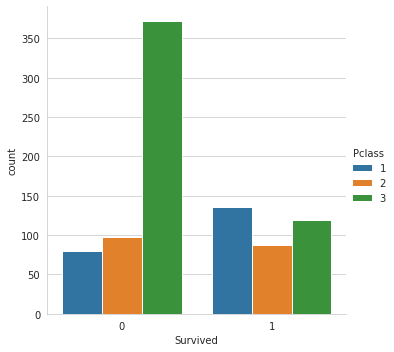

In [83]:
## checking of the class had any effect in the survival rate
sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


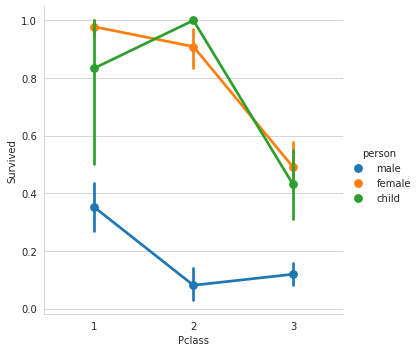

In [84]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

The above graph shows that the survival rate for male is very low nevertheless of the class. And, the survival rate is less for the 3rd class passengers.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


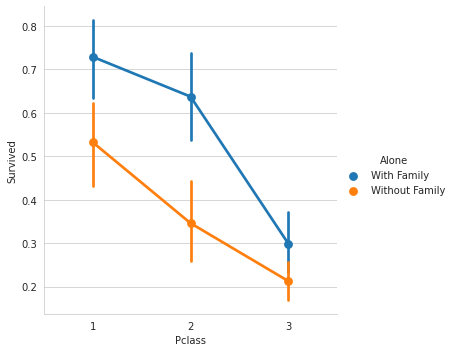

In [85]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='Alone')

As expected, the survival rates are higher if they are with family.  Let us check how Age playes a role in the survival rate.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


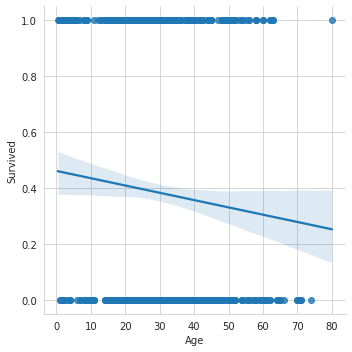

In [86]:
sns.lmplot('Age','Survived',data=titanic_df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


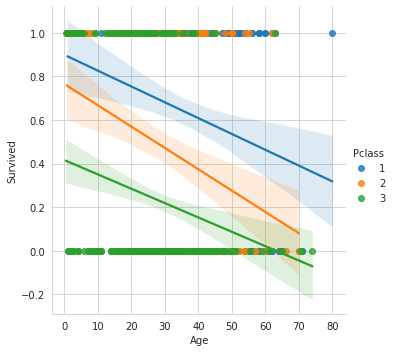

In [87]:


sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

The above graphs shows that  older the passenger, lesser the chance of survival. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


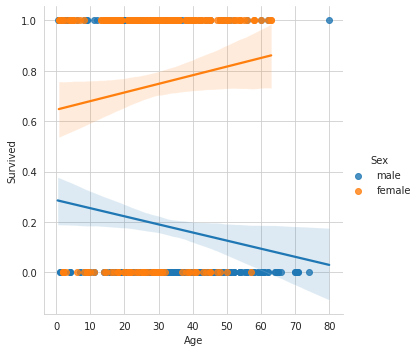

In [88]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


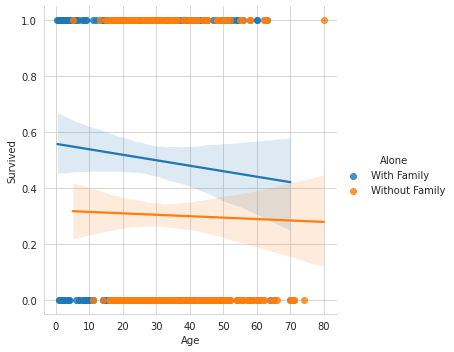

In [89]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Alone')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


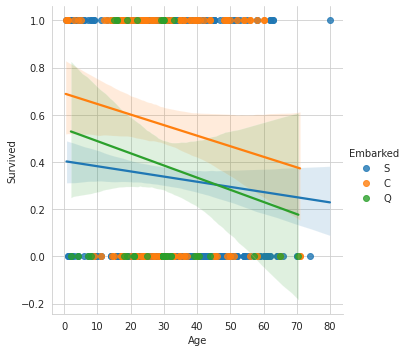

In [90]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Embarked')

Shockingly, the number of passengers boarded at Southhampton are more compared to Cherbourg and Queenstown but the survival rate is high for Cherbour passengers than Southhampton. So there is a chance that Embarked  helps in prediction. Let us create dummies of the Embarked and drop the Queenstown to avoid multicollinearity(might be caused due to dummies) and there are quiet a few passengers boarded at Queenstown(more are from 3rd class which has less survival rate)

Now from the analysis we understood the important features for making predictions. 
Features to be used for Predicting: Age, female,child,with family, C, S, class_1, class_2,Fare
Now let's drop the other features like PassengerId, Name, Sibsp, Parch, Ticket as these are not much useful in the predictions. Also drop other features like without family, male, class_3,Q as they having a very low survival rate. 

In [91]:
person_dummies = pd.get_dummies(titanic_df['person'])
alone_dummies = pd.get_dummies(titanic_df['Alone'])

embarked_dummies = pd.get_dummies(titanic_df['Embarked'])

embarked_dummies.drop('Q',axis=1,inplace=True)

In [92]:
pclass_dummies = pd.get_dummies(titanic_df['Pclass'])

pclass_dummies.columns=['class_1','class_2','class_3']

In [93]:
import math

titanic_df['Age'] = titanic_df['Age'].apply(math.ceil)
titanic_df['Fare'] = titanic_df['Fare'].apply(math.ceil)

In [94]:
titanic_df = pd.concat([titanic_df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [95]:
titanic_df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
titanic_df.drop(['Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [96]:
titanic_df.head()

,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [97]:
titanic_train = titanic_df.drop('Survived',axis=1)
titanic_survived = titanic_df.Survived


In [98]:
x_train, x_test, y_train, y_test = train_test_split(titanic_train,titanic_survived,test_size=0.2)

In [99]:
x_train.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
873,47,9,0,0,0,0,0,0,1
537,30,107,1,0,0,1,0,1,0
693,25,8,0,0,0,0,0,1,0
540,36,71,1,0,0,1,1,0,1
72,21,74,0,1,0,0,0,0,1


In [100]:
x_train.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
873,47,9,0,0,0,0,0,0,1
537,30,107,1,0,0,1,0,1,0
693,25,8,0,0,0,0,0,1,0
540,36,71,1,0,0,1,1,0,1
72,21,74,0,1,0,0,0,0,1


In [101]:
x_test.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
461,34,9,0,0,0,0,0,0,1
336,29,67,1,0,0,0,1,0,1
555,62,27,1,0,0,0,0,0,1
741,36,79,1,0,0,0,1,0,1
451,30,20,0,0,0,0,1,0,1


In [102]:
log_model = LogisticRegression()

log_model.fit(x_train,y_train)

train_survival = log_model.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
print("Accuracy Score of logistic model is",metrics.accuracy_score(y_true=y_test,y_pred=train_survival))


Accuracy Score of logistic model is 0.8156424581005587


In [104]:
corr_coeff = list(zip(x_train.columns,np.transpose(log_model.coef_)))

In [105]:
print('Correlation coefficients are ',corr_coeff)

Correlation coefficients are  [('Age', array([-0.02693193])), ('Fare', array([0.00155111])), ('class_1', array([1.90473093])), ('class_2', array([1.07836292])), ('child', array([1.60054724])), ('female', array([2.62414636])), ('With Family', array([-0.24553937])), ('C', array([-0.10152204])), ('S', array([-0.49347257]))]


In [106]:
rand_model = RandomForestClassifier()
rand_model.fit(x_train,y_train)

rand_predict = rand_model.predict(x_test)
#rand_model.score(y_test,rand_predict)

In [107]:
print("Accuracy Score of Random Forest model is",metrics.accuracy_score(y_true=y_test,y_pred=rand_predict))

Accuracy Score of Random Forest model is 0.7988826815642458


In [108]:
## Null error rate

y_train.mean()

## The accuarcy is greater than the 1-y_train.mean() = x < accuracy which means the model is not just guessing the output.


0.38342696629213485

In [110]:
## Laoding the test data
titanic_df_test = pd.read_csv('titanic.csv')

In [111]:
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
## Storing the PassengerId column for the submission purpose
passenger_id = titanic_df_test.PassengerId

In [113]:
embarked_test_dummies = pd.get_dummies(titanic_df_test['Embarked'])

embarked_test_dummies.drop('Q',axis=1,inplace=True)

In [114]:
titanic_df_test['Alone'] = titanic_df_test.SibSp + titanic_df_test.Parch

titanic_df_test['Alone'].loc[titanic_df_test['Alone']>0] = 'With Family'
titanic_df_test['Alone'].loc[titanic_df_test['Alone'] == 0] = 'Without Family'

#titanic_df_test.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [115]:
alone_test_dummies = pd.get_dummies(titanic_df_test['Alone'])

pclass_test_dummies = pd.get_dummies(titanic_df_test['Pclass'])

pclass_test_dummies.columns = ['class_1','class_2','class_3']



In [116]:
titanic_df_test['person'] = titanic_df_test[['Age','Sex']].apply(titanic_children,axis=1)

person_test_dummies = pd.get_dummies(titanic_df_test['person'])

In [117]:
titanic_df_test = pd.concat([titanic_df_test,embarked_test_dummies,alone_test_dummies,person_test_dummies,pclass_test_dummies],axis=1)

In [118]:
titanic_df_test.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [119]:
titanic_df_test.head()

,Age,Fare,C,S,With Family,child,female,class_1,class_2
0,34.5,7.8292,0,0,0,0,0,0,0
1,47.0,7.0000,0,1,1,0,1,0,0
2,62.0,9.6875,0,0,0,0,0,0,1
3,27.0,8.6625,0,1,0,0,0,0,0
4,22.0,12.2875,0,1,1,0,1,0,0


In [120]:
titanic_df_test['Age'] = titanic_df_test['Age'].fillna(titanic_df_test['Age'].mean())

In [121]:
titanic_df_test['Fare'] = titanic_df_test['Fare'].fillna(titanic_df_test['Fare'].mean())

In [122]:
titanic_df_test['Age'] = titanic_df_test['Age'].apply(math.ceil)
titanic_df_test['Fare'] = titanic_df_test['Fare'].apply(math.ceil)

In [123]:
survival_prediction = log_model.predict(titanic_df_test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [124]:
rand_survival_predictions = rand_model.predict(titanic_df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [125]:
Final_predictions = DataFrame({'passenger_id':passenger_id,'survived':survival_prediction})

Final_predictions.to_csv('sample_submission.csv',index=False)

In [126]:
Final_predictions.head()

,passenger_id,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [137]:
### Let's see if our intuitions were correctly predicted by the model
check_model = pd.read_csv('titanic.csv')

In [138]:
check_model['survived'] = rand_survival_predictions

In [139]:
check_model

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [140]:
check_model['Age'] = check_model['Age'].fillna(check_model['Age'].mean())

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


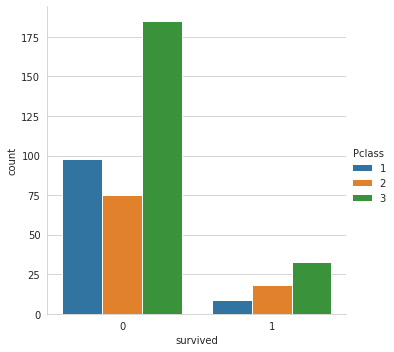

In [141]:
sns.factorplot('survived',data=check_model,kind='count',hue='Pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


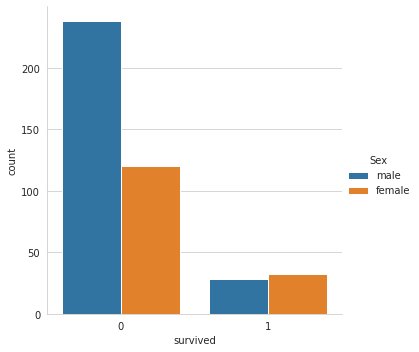

In [142]:
sns.factorplot('survived',data=check_model,kind='count',hue='Sex')